In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.cluster import hierarchy

In [2]:
dfmovies = pandas.read_csv('Datasets/Movies/movies_description.txt',sep='|',header=None)
dfusers = pandas.read_csv('Datasets/Movies/users_description.txt',sep='|',header=None)
dfscores = pandas.read_csv('Datasets/Movies/movies_users.txt',sep='\t',header=None)

In [3]:
nusers = len(dfusers.values)
nmovies = len(dfmovies.values)
print('nusers',nusers)
print('nmovies',nmovies)

nusers 943
nmovies 1682


In [4]:
evaluations = np.zeros((nmovies,nusers))
evaluations[ dfscores.values[:,1]-1, dfscores.values[:,0]-1 ] = dfscores.values[:,2]

dfevaluations = pandas.DataFrame(evaluations,index=dfmovies.values[:,1],columns=np.arange(nusers)+1)
dfevaluations

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
Toy Story (1995),5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
GoldenEye (1995),3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Four Rooms (1995),4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Get Shorty (1995),3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Copycat (1995),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B. Monkey (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sliding Doors (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You So Crazy (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filtering

In [5]:
tmovies = np.array(list(dfevaluations.index))
idusers = dfevaluations.columns
for i in range(nmovies):
    tmovies[i] = tmovies[i][:10]
print(tmovies[:5])

['Toy Story ' 'GoldenEye ' 'Four Rooms' 'Get Shorty' 'Copycat (1']


In [6]:
bevaluations = evaluations!=0

In [7]:
# Filtering movies
neval = np.sum( bevaluations, axis=1 )
idx = np.argsort(neval)[::-1]
idx = idx[:50]

evaluations = evaluations[idx,:]
tmovies = tmovies[idx]

In [8]:
# Filtering users
neval = np.sum( bevaluations, axis=0 )
idx = np.argsort(neval)[::-1]
idx = idx[:100]

evaluations = evaluations[:,idx]
idusers = idusers[idx]

In [9]:
dfevaluations = pandas.DataFrame(evaluations,index=tmovies,columns=idusers)
dfevaluations

,405,655,13,450,276,416,537,303,234,393,...,184,788,314,894,666,506,932,886,798,244
Star Wars,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,...,4.0,0.0,0.0,4.0,3.0,5.0,0.0,5.0,5.0,5.0
Contact (1,0.0,2.0,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,...,3.0,4.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,5.0
Fargo (199,0.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,1.0,...,5.0,5.0,0.0,4.0,4.0,0.0,5.0,4.0,0.0,4.0
Return of,5.0,3.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,4.0,...,4.0,0.0,0.0,0.0,2.0,5.0,0.0,5.0,5.0,4.0
Liar Liar,0.0,3.0,2.0,4.0,4.0,4.0,1.0,4.0,3.0,4.0,...,0.0,3.0,5.0,0.0,3.0,4.0,0.0,0.0,0.0,4.0
English Pa,0.0,3.0,3.0,4.0,0.0,5.0,3.0,5.0,3.0,0.0,...,4.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
Scream (19,5.0,3.0,1.0,3.0,4.0,5.0,2.0,4.0,3.0,3.0,...,0.0,0.0,5.0,3.0,3.0,0.0,0.0,4.0,0.0,0.0
Toy Story,0.0,2.0,3.0,4.0,5.0,5.0,2.0,5.0,3.0,3.0,...,4.0,3.0,5.0,4.0,0.0,0.0,4.0,4.0,4.0,4.0
Air Force,0.0,3.0,1.0,4.0,4.0,4.0,1.0,1.0,3.0,0.0,...,0.0,5.0,0.0,4.0,3.0,3.0,0.0,0.0,0.0,0.0
Independen,0.0,3.0,5.0,3.0,4.0,5.0,1.0,3.0,0.0,4.0,...,2.0,4.0,4.0,3.0,3.0,0.0,3.0,0.0,5.0,1.0


# Principal Component Analysis

In [10]:
X = evaluations
n = len(X)

In [11]:
model = PCA()
model.fit(X)
X2 = model.transform(X)
X2 = X2[:,:2]

[0.225 0.095 0.066 0.053 0.047 0.036 0.033 0.031 0.029 0.027 0.026 0.023
 0.022 0.021 0.019 0.018 0.017 0.016 0.015 0.014 0.014 0.013 0.012 0.011
 0.01  0.009 0.009 0.008 0.008 0.007 0.007 0.006 0.006 0.005 0.005 0.004
 0.004 0.004 0.004 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.001 0.001
 0.001 0.   ]


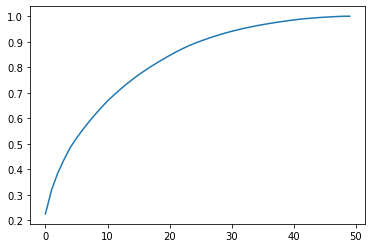

In [12]:
exp_var = model.explained_variance_ratio_
print(np.round(exp_var,3))
exp_var_acum = np.cumsum(exp_var)
plt.figure()
plt.plot(exp_var_acum)
plt.show()

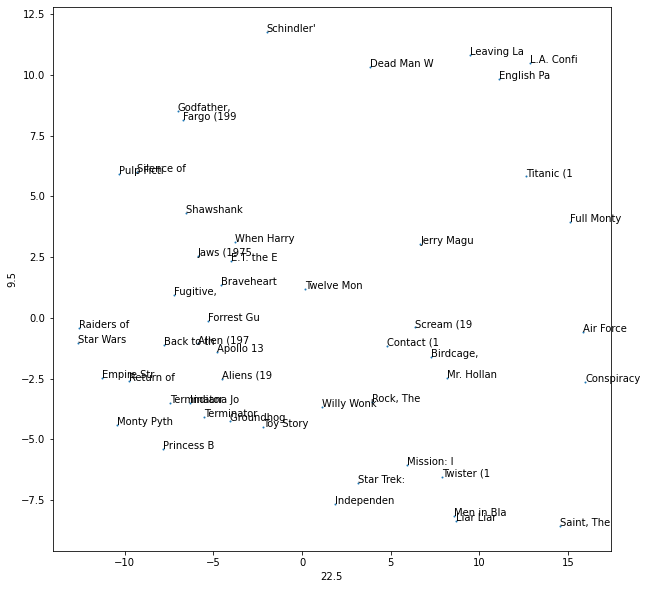

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(X2[:,0],X2[:,1],s=1)
for i in range(n):
    plt.text(X2[i,0],X2[i,1], tmovies[i])
plt.xlabel(np.round(exp_var[0],3)*100)
plt.ylabel(np.round(exp_var[1],3)*100)
plt.show()

# MDS

In [14]:
model = MDS(n_components=2)
X2 = model.fit_transform(X)

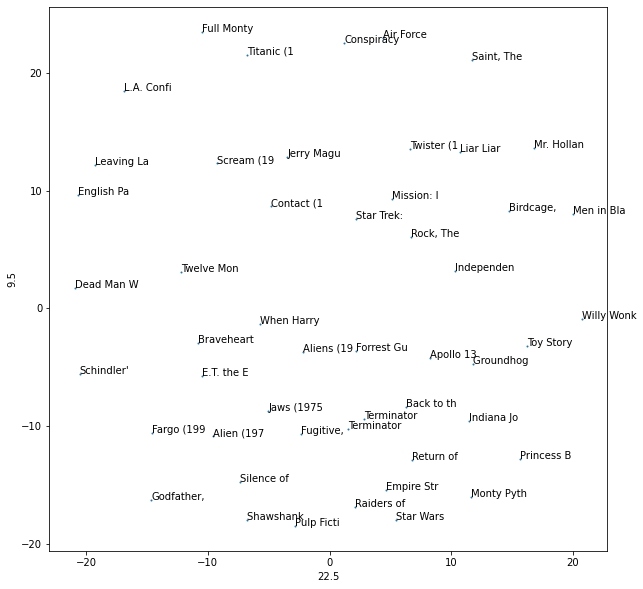

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(X2[:,0],X2[:,1],s=1)
for i in range(n):
    plt.text(X2[i,0],X2[i,1], tmovies[i])
plt.xlabel(np.round(exp_var[0],3)*100)
plt.ylabel(np.round(exp_var[1],3)*100)
plt.show()

# Hierarchical Clustering

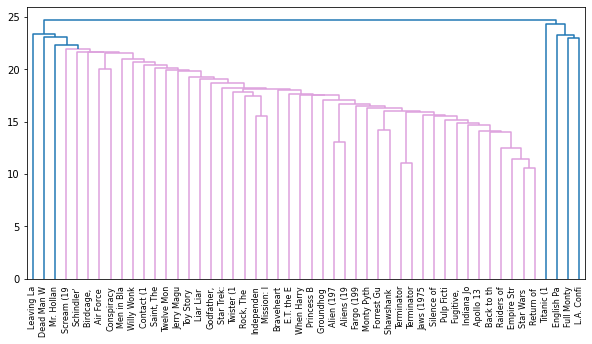

In [16]:
hierarchy.set_link_color_palette(['plum','lightseagreen', 'silver'])

plt.figure(figsize=(10,5))
Z = hierarchy.linkage(X)
dn = hierarchy.dendrogram(Z, labels=tmovies, color_threshold=22)
plt.show()

In [17]:
g = hierarchy.fcluster(Z,criterion='distance',t=22.0)
print(g)

[1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 1 5 1 1 1 3 1 4 6
 1 1 1 1 2 1 1 1 1 1 1 1 1]


In [18]:
groups = np.unique(g)
for group in groups:
    print(tmovies[g==group])

['Star Wars ' 'Contact (1' 'Fargo (199' 'Return of ' 'Liar Liar '
 'Scream (19' 'Toy Story ' 'Air Force ' 'Independen' 'Raiders of'
 'Godfather,' 'Pulp Ficti' 'Twelve Mon' 'Silence of' 'Jerry Magu'
 'Rock, The ' 'Empire Str' 'Star Trek:' 'Back to th' 'Mission: I'
 'Fugitive, ' 'Indiana Jo' 'Willy Wonk' 'Princess B' 'Forrest Gu'
 'Monty Pyth' 'Saint, The' 'Men in Bla' 'Terminator' 'E.T. the E'
 "Schindler'" 'Braveheart' 'Terminator' 'Conspiracy' 'Birdcage, '
 'Twister (1' 'Alien (197' 'When Harry' 'Aliens (19' 'Shawshank '
 'Jaws (1975' 'Groundhog ' 'Apollo 13 ']
['Mr. Hollan']
['Dead Man W']
['Leaving La']
['Full Monty']
['L.A. Confi']
['English Pa']
['Titanic (1']
